# Modeling

## Imports

In [34]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import rmse

## Import Pickle File

In [2]:
infile = open('data/pickles/demolished_buildings.pickle', 'rb')
demolished_buildings = pickle.load(infile)
infile.close()

In [3]:
type(demolished_buildings)

pandas.core.frame.DataFrame

In [4]:
demolished_buildings.head(4)

,policeprct,healtharea,zonedist1,zonedist2,zonedist3,overlay1,spdist1,spdist2,ltdheight,splitzone,...,factryarea,bldgfront,ext,irrlotcode,lottype,assesstot,yearbuilt,histdist,landmark,lifespan
82,13.0,5900.0,C1-8A,0,0,0,0,0,0,N,...,0.0,0.0,0,N,5.0,478592.0,1972,0,0,46
106,108.0,1021.0,R5D,0,0,0,0,0,0,N,...,0.0,0.0,0,Y,6.0,64380.0,1972,0,0,30
134,81.0,3100.0,C4-4L,0,0,0,0,0,0,N,...,0.0,72.0,E,N,5.0,1757700.0,1922,0,0,69
185,66.0,5310.0,C8-2,0,0,0,OP,0,0,N,...,0.0,0.0,0,Y,5.0,19350.0,1972,0,0,25


## Continuous & Categorical Variables

In [5]:
all_cols = list(demolished_buildings.columns)
all_cols = sorted(all_cols)
all_cols

['assesstot',
 'bldgclass',
 'bldgfront',
 'ext',
 'factryarea',
 'healtharea',
 'histdist',
 'irrlotcode',
 'landmark',
 'lifespan',
 'lotarea',
 'lottype',
 'ltdheight',
 'overlay1',
 'ownertype',
 'policeprct',
 'spdist1',
 'spdist2',
 'splitzone',
 'strgearea',
 'yearbuilt',
 'zonedist1',
 'zonedist2',
 'zonedist3']

In [6]:
# making a list of continuous columns
cont_cols = ['lotarea', 'strgearea','factryarea', 'bldgfront', 'assesstot', 'yearbuilt']

# making a dataframe of continuous columns
cont_cols_df = demolished_buildings[['lotarea', 'strgearea','factryarea', 'bldgfront', 'assesstot', 'yearbuilt']]

#making a list of categorical columns
cat_cols = []

for col in all_cols:
    if col in cont_cols:
        pass
    if col == 'lifespan':
        pass
    else:
        cat_cols.append(col)
    
print(cat_cols)
print(len(cat_cols))

['assesstot', 'bldgclass', 'bldgfront', 'ext', 'factryarea', 'healtharea', 'histdist', 'irrlotcode', 'landmark', 'lotarea', 'lottype', 'ltdheight', 'overlay1', 'ownertype', 'policeprct', 'spdist1', 'spdist2', 'splitzone', 'strgearea', 'yearbuilt', 'zonedist1', 'zonedist2', 'zonedist3']
23


## Train Test Split

In [7]:
# try a model using only continous variables
X = cont_cols_df
y = demolished_buildings['lifespan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

## Model 1 : Linear Regression

Using Continuous Variables only.

### From Scratch

In [44]:
model1 = LinearRegression(fit_intercept=True, copy_X=True).fit(X_train, y_train)

#make predictions using test set
y_pred1 = model1.predict(X_test)

# find coefficients
model_1_coef = model1.coef_
print('Coefficients: ', model_1_coef)

# find mean squared error
MSE = mean_squared_error(y_test, y_pred1)
print('Mean Squared Error ', MSE)

#find root mean squared error RMSE
print('Root Mean Squared Error ', np.sqrt(MSE))

#MAE = mean_absolute_error(y, y_pred1)
# find mean absolute error
#print('Mean Absolute Error ', MAE)

print('R-Squared', r2_score(y_test, y_pred1))

print('Accuracy Score ', model1.score(X_test, y_test))

Coefficients:  [-3.16518619e-06 -1.40434778e-05  4.64912955e-05  1.90016727e-02
  1.76669125e-10 -1.03931183e+00]
Mean Squared Error  83.50043288795412
Root Mean Squared Error  9.137857127792824
R-Squared 0.9016724101573149
Accuracy Score  0.9016724101573149


In [45]:
coefficients1 = dict(zip(cont_cols, model_1_coef))
coefficients1

{'lotarea': -3.165186189328124e-06,
 'strgearea': -1.4043477822092771e-05,
 'factryarea': 4.649129550462128e-05,
 'bldgfront': 0.01900167271613683,
 'assesstot': 1.7666912452889011e-10,
 'yearbuilt': -1.039311825265042}

In [46]:
cross_val_score(estimator = model1, X=X_test, y=y_test, cv=None)

array([0.89272863, 0.88147014, 0.90693815, 0.90168005, 0.90782767])

In [47]:
y_pred1

array([ 84.12363141, 101.33359138,  35.37609118, ...,  34.97352758,
        78.52649538,  34.97651041])

__Comments__

Even though most of the data did not have a linear relationship to the target variable, the model performed well. 

The r-squared value is 0.90, which means that the model explains 90% of the variation in building lifespan.

The coefficients indicate tha factryarea and assesstot have the strongest influence on lifespan.

An RMSE of 9.1 means that the predictions are off by 9 years on average in either direction.

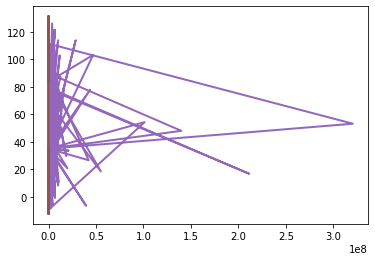

In [58]:
#plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_test, y_pred1, linewidth=2)
plt.show()

In [52]:
X_test.shape

(1170, 6)

In [53]:
y_test.shape

(1170,)

In [56]:
y_test.to_numpy().reshape(1170,6)

ValueError: cannot reshape array of size 1170 into shape (1170,6)

In [54]:
type(y_test)

pandas.core.series.Series

In [65]:
df_pred1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
df_pred1.head(10)

,Actual,Predicted
36977,94,84.123631
35941,109,101.333591
33183,25,35.376091
13343,30,34.964462
21854,37,38.368223
30409,3,3.701300
16183,19,34.972375
26305,39,33.237700
37106,64,53.813340
35974,22,9.790590


### Using Statsmodels

In [21]:
Xcont_train = sm.add_constant(X_train)
Xcont_test = sm.add_constant(X_test)

model = sm.OLS(y_train, Xcont_train)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     3675.
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               0.00
Time:                        08:07:55   Log-Likelihood:                -8551.1
No. Observations:                2373   AIC:                         1.712e+04
Df Residuals:                    2366   BIC:                         1.716e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2084.5033     14.479    143.967      0.000    2056.110    2112.896
lotarea    -3.165e-06   1.19e-06     -2.650      0.008   -5.51e-06   -8.23e-07
strgearea  -1.404e-05    5.6e-06     -2.508      0.012    -2.5e-05   -3.06e-06
factryarea  4.649e-05   4.17e-05      1.115      0.265   -3.53e-05       0.000
bldgfront      0.0190      0.004      4.854      0.000       0.011       0.027
assesstot   1.767e-10   1.91e-08      0.009      0.993   -3.73e-08    3.76e-08
yearbuilt     -1.0393      0.007   -140.685      0.000      -1.054      -1.025
==============================================================================
Omnibus:                      982.092   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.554
Skew:                          -0.329   Prob(JB):                     5.03e-36
Kurtosis:                       1.899   Cond. No.                     8.04e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
y_predict = fitted_model.predict(Xcont_test)

__Comments__

R-squared of 0.903 means that the coefficients are explaining 90% of the variation of the target variable, lifespan. 

This model is a double check confirming the results of the first model.

P-value for factryarea and assesstot are > 0.05, so these coefficients are irrelevant for predicting the target and should be dropped. However, this will result in less than 5 variables, so some of the categorical variables will need to be added.


## Model 2A : Linear Regression

### Using Statsmodels

## Model 3: Polynomial Regression

In [22]:
# Polynomial Regression

pf = PolynomialFeatures(degree = 4, interaction_only=False, include_bias=True)

poly_data = pf.fit_transform(X_train)

poly_cols = pf.get_feature_names(input_features = cont_cols)

poly_df = pd.DataFrame(poly_data, columns = poly_cols, index = y_train.index)

poly_df.head(3)

,1,lotarea,strgearea,factryarea,bldgfront,assesstot,yearbuilt,lotarea^2,lotarea strgearea,lotarea factryarea,...,bldgfront^2 yearbuilt^2,bldgfront assesstot^3,bldgfront assesstot^2 yearbuilt,bldgfront assesstot yearbuilt^2,bldgfront yearbuilt^3,assesstot^4,assesstot^3 yearbuilt,assesstot^2 yearbuilt^2,assesstot yearbuilt^3,yearbuilt^4
28913,1.0,1875.0,0.0,0.0,20.0,46860.0,1920.0,3515625.0,0.0,0.0,...,1.474560e+09,2.057960e+15,8.432101e+13,3.454894e+12,1.415578e+11,4.821799e+18,1.975641e+17,8.094817e+15,3.316698e+14,1.358954e+13
12976,1.0,4121.0,0.0,0.0,36.0,250200.0,1961.0,16982641.0,0.0,0.0,...,4.983795e+09,5.638511e+17,4.419312e+15,3.463738e+13,2.714784e+11,3.918765e+21,3.071422e+19,2.407298e+17,1.886775e+15,1.478803e+13
13333,1.0,26615.0,0.0,0.0,0.0,138480.0,1972.0,708358225.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.677462e+20,5.236825e+18,7.457408e+16,1.061959e+15,1.512264e+13


In [23]:
poly_model = sm.OLS(y_train, poly_data, hasconst = True)
poly_model_fitted = poly_model.fit()
poly_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               lifespan   R-squared:                      -2.906
Model:                            OLS   Adj. R-squared:                 -2.943
Method:                 Least Squares   F-statistic:                    -79.47
Date:                Wed, 02 Sep 2020   Prob (F-statistic):               1.00
Time:                        08:08:41   Log-Likelihood:                -12937.
No. Observations:                2373   AIC:                         2.592e+04
Df Residuals:                    2350   BIC:                         2.605e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.652e-19   1.92e-20      8.600      0.000    1.28e-19    2.03e-19
x1         -3.747e-19   4.44e-20     -8.436      0.000   -4.62e-19   -2.88e-19
x2          1.103e-21   3.72e-22      2.968      0.003    3.74e-22    1.83e-21
x3         -1.561e-23   9.99e-24     -1.563      0.118   -3.52e-23    3.97e-24
x4          1.085e-23   2.83e-24      3.828      0.000    5.29e-24    1.64e-23
x5         -1.772e-23    5.1e-24     -3.475      0.001   -2.77e-23   -7.72e-24
x6          1.193e-24   3.39e-25      3.514      0.000    5.27e-25    1.86e-24
x7          1.966e-24   4.52e-25      4.345      0.000    1.08e-24    2.85e-24
x8           9.92e-25   3.05e-25      3.252      0.001    3.94e-25    1.59e-24
x9          1.122e-24   2.97e-25      3.778      0.000     5.4e-25     1.7e-24
x10         2.005e-24   5.75e-25      3.489      0.000    8.78e-25    3.13e-24
x11         5.136e-24    6.6e-25      7.780      0.000    3.84e-24    6.43e-24
x12         6.961e-24   2.01e-24      3.472      0.001    3.03e-24    1.09e-23
x13         1.099e-22   3.15e-23      3.484      0.001     4.8e-23    1.72e-22
x14          4.62e-22   1.34e-22      3.439      0.001    1.99e-22    7.26e-22
x15         4.797e-24   3.43e-24      1.399      0.162   -1.93e-24    1.15e-23
x16        -9.077e-22   2.99e-22     -3.031      0.002    -1.5e-21    -3.2e-22
x17         2.181e-28   5.62e-29      3.879      0.000    1.08e-28    3.28e-28
x18         6.354e-28   1.44e-28      4.412      0.000    3.53e-28    9.18e-28
x19         1.125e-29   2.88e-30      3.909      0.000    5.61e-30    1.69e-29
x20         2.753e-26   6.59e-27      4.178      0.000    1.46e-26    4.05e-26
x21         1.729e-28   4.35e-29      3.971      0.000    8.75e-29    2.58e-28
x22        -8.223e-31   2.93e-31     -2.807      0.005    -1.4e-30   -2.48e-31
x23         2.668e-26   5.91e-27      4.516      0.000    1.51e-26    3.83e-26
x24         3.111e-29   7.95e-30      3.913      0.000    1.55e-29    4.67e-29
x25         4.532e-23   7.67e-24      5.908      0.000    3.03e-23    6.04e-23
x26         7.436e-25   1.75e-25      4.246      0.000       4e-25    1.09e-24
x27         2.557e-27   6.64e-28      3.854      0.000    1.26e-27    3.86e-27
x28         1.254e-21   3.41e-22      3.677      0.000    5.85e-22    1.92e-21
x29         5.659e-23   1.29e-23      4.393      0.000    3.13e-23    8.18e-23
x30         4.552e-24   1.08e-24      4.203      0.000    2.43e-24    6.68e-24
x31         1.808e-23   4.68e-24      3.861      0.000     8.9e-24    2.73e-23
x32        -1.604e-21   8.88e-22     -1.806      0.071   -3.35e-21    1.38e-22
x33         5.679e-22   6.85e-23      8.291      0.000    4.34e-22    7.02e-22
x34         2.067e-23    4.9e-24      4.221      0.000    1.11e-23    3.03e-23
x35        -2.043e-26   4.64e-27     -4.400      0.000   -2.95e-26   -1.13e-26
x3

__Comments__

An R-squared value of -2.9 is very poor. A negative r-squared means that the model is no better than taking the mean value. The model is not capturing any information from the variables.

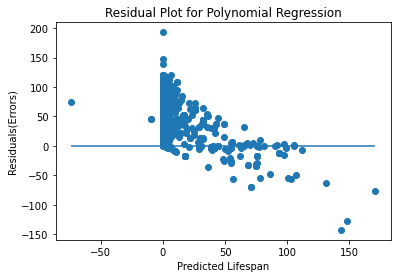

In [25]:
y_poly_predict = poly_model_fitted.predict(poly_data)

poly_residuals = y_train - y_poly_predict
plt.scatter(y_poly_predict, poly_residuals)
plt.hlines(y = 0, xmin = y_poly_predict.min(), xmax=y_poly_predict.max())
plt.title('Residual Plot for Polynomial Regression')
plt.xlabel('Predicted Lifespan')
plt.ylabel('Residuals(Errors)')
plt.show()

__Conclusion__

There is a pattern in the residuals plot. This model is performing very poorly.

There are two predicted values that have negative lifespan. This is very usual. Look at the training data to see if there are any negative lifespan values.

## Check Distribution of the Variables

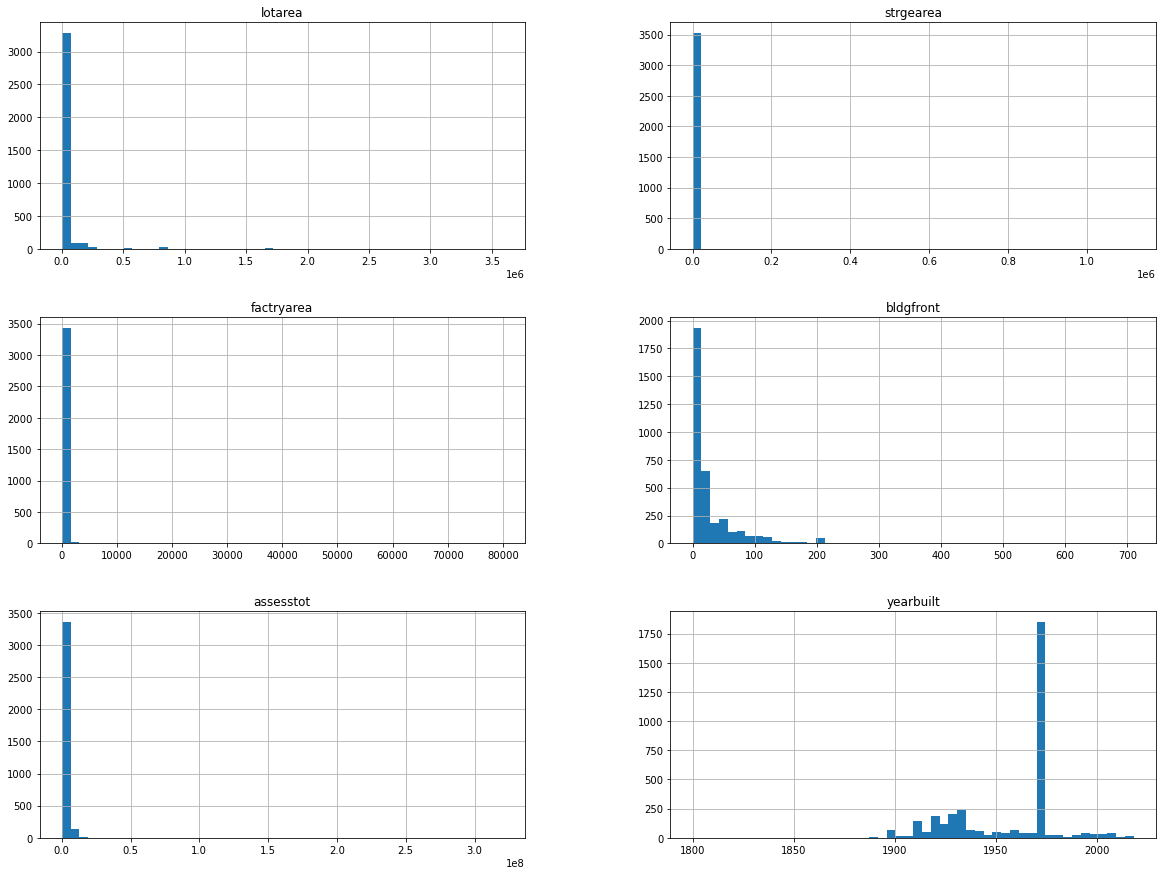

In [26]:
cont_cols_df.hist(bins=50,figsize=(20,15))
plt.show()

__Comments__

The data is highly skewed to the left.

## Normalize

In [27]:
def normalize_data(data, cols):
    """
    Function takes data in the form of a dataframe and returns the normalized data.
    """
    from sklearn.preprocessing import Normalizer

    norm = Normalizer().fit_transform(data)
    new_data = pd.DataFrame(norm, columns=cols)
    return new_data

X_test_norm = normalize_data(X_test, cont_cols)
X_train_norm = normalize_data(X_train, cont_cols)

In [28]:
X_test_norm.head(3)

,lotarea,strgearea,factryarea,bldgfront,assesstot,yearbuilt
0,0.046258,0.0,0.0,0.000278,0.998371,0.033400
1,0.001154,0.0,0.0,0.000016,0.999999,0.000298
2,0.122187,0.0,0.0,0.000102,0.992477,0.007753


In [29]:
def normalize_target(target, name):
    """
    Function takes the target variable as input in the form of a numpy array and returns the normalized array.
    """
    from sklearn.preprocessing import Normalizer
    target = target.to_numpy()
    target = target.reshape(-1, 1)
    norm = Normalizer().fit_transform(target)
    new_target = pd.DataFrame(norm, columns=name)
    return new_target

target_name = ['lifespan']

y_train_norm = normalize_target(y_train, target_name)
y_test_norm = normalize_target(y_test, target_name)

## Scale

In [30]:
def scaler(data):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    scaled_data = pd.DataFrame(scaled_data)
    return scaled_data


X_train_scaled = scaler(X_train_norm)
X_test_scaled = scaler(X_test_norm)
y_train_scaled = scaler(y_train_norm)
y_test_scaled = scaler(y_test_norm)

In [31]:
type(X_train_scaled)

pandas.core.frame.DataFrame

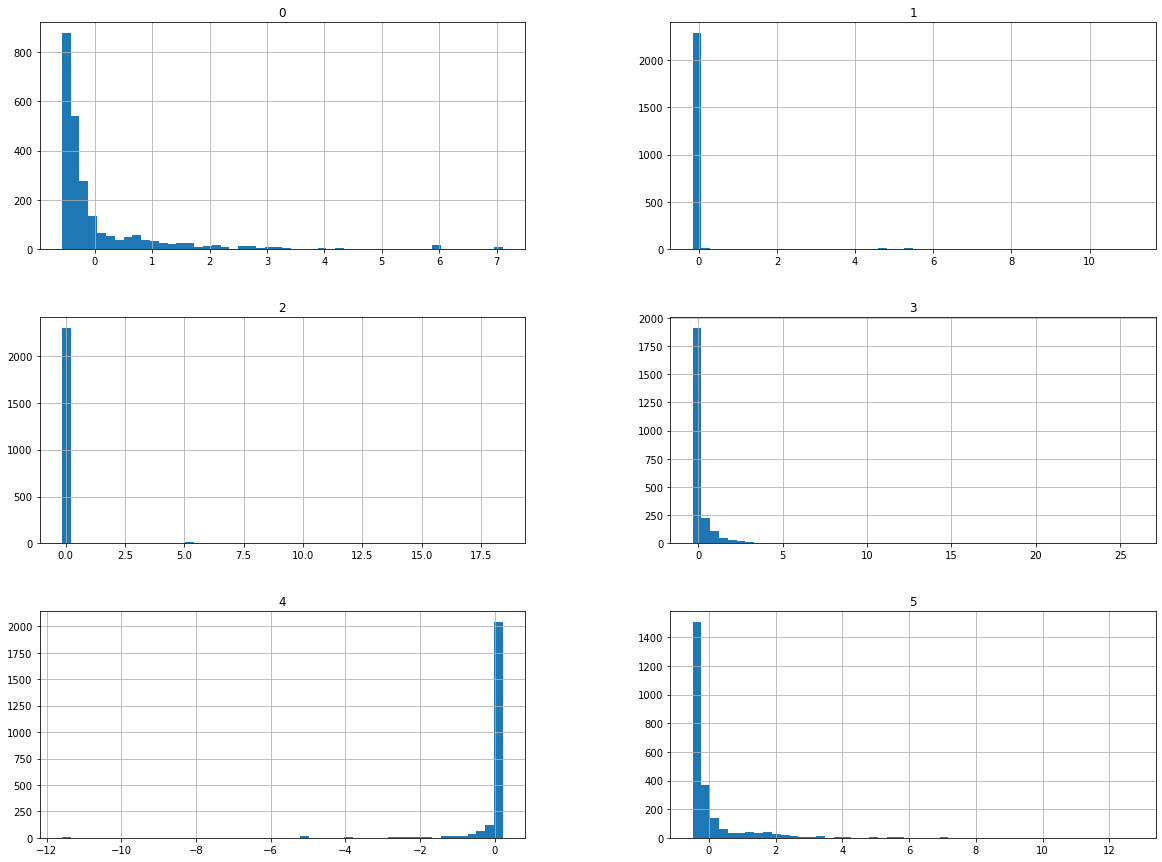

In [32]:
X_train_scaled.hist(bins=50, figsize=(20,15));

__Comments__

Scaling and normalizing had little effect on the distribution. There may be outliers that are affecting the data.

## Model 4: Decision Tree

In [33]:
dt = DecisionTreeRegressor(max_depth=2, criterion='mse', random_state=12, splitter='random', 
                           min_samples_split=2, min_samples_leaf=1)

dt.fit(X_train_scaled, y_train_scaled)

y_pred_dt = dt.predict(X_test_scaled)

dt.score(X_test_scaled, y_pred_dt)

1.0

__Comments__

The decision tree overfit.

The linear regression model performs the best out of the 3 options.